In [1]:
import pandas as pd
import altair as alt

In [2]:
df = pd.read_pickle('AR.pkl')

In [3]:
df.head()

,lucht1,lucht2,NH4,lucht
level_1,,,,
2018-08-01 00:00:00,5362.2,5650.6,68.6,11012.8
2018-08-01 01:00:00,6223.8,5862.7,70.1,12086.5
2018-08-01 02:00:00,5935.9,6391.4,69.3,12327.3
2018-08-01 03:00:00,5730.7,5438.9,68.5,11169.6
2018-08-01 04:00:00,5730.7,5686.7,63.2,11417.4


In [4]:
df.reset_index().dtypes

level_1    datetime64[ns]
lucht1            float64
lucht2            float64
NH4               float64
lucht             float64
dtype: object

C:\ProgramData\Miniconda3\lib\site-packages\altair\utils\core.py:284: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


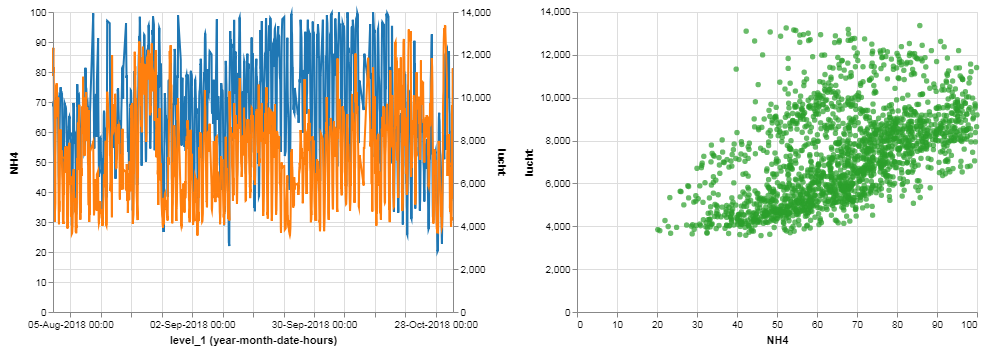

In [5]:
# interval selection in the line plot
pts = alt.selection(type="interval", encodings=["x"])

# left panel: line plot
lines = alt.Chart().encode(
    alt.X('yearmonthdatehours(level_1)',
        axis=alt.Axis(format='%d-%b-%Y %H:%M'),
        scale=alt.Scale(zero=False)
    )
)

line_1 = lines.mark_line(color='#1F77B4').encode(
    y="NH4"
)

line_2 = lines.mark_line(color='#FF7F0E').encode(
    y="lucht"
).properties(
    selection=pts
)

# right panel: scatter plot
points = alt.Chart().mark_point(filled=True, color='#2CA02C').encode(
    x='NH4',
    y='lucht'
).transform_filter(
    pts.ref()
)

# build the chart:
alt.hconcat(
    alt.layer(line_1, line_2).resolve_scale(y='independent'),
    points,    
    data=df.reset_index()
)

In [ ]:
# line1 = alt.Chart(df.reset_index()).mark_line(color='green').encode(
#     alt.X('yearmonthdatehours(level_1)'),
#     alt.Y('NH4',
#          axis=alt.Axis(orient='left'), scale=alt.Scale(zero=False)),
# ).add_selection(
#     brush
# )

# line2 = alt.Chart(df.reset_index()).mark_line(color='blue').encode(
#     alt.X('level_1'),
#     alt.Y('lucht',
#           axis=alt.Axis(orient='right'),
#          scale=alt.Scale(zero=False))
# )

# line = alt.layer(
#     line1,
#     line2
# ).resolve_scale(y='independent'
# )

# scat = alt.Chart(df.reset_index()).mark_point(color='blue').encode(
#     alt.X('NH4'),
#     alt.Y('lucht')
# ).transform_filter(
#     brush
# )

# line | scat
